In [61]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
load_dotenv()

True

In [62]:
model=ChatGroq(model="openai/gpt-oss-120b")

In [63]:
from langchain_community.tools import DuckDuckGoSearchRun

search = DuckDuckGoSearchRun()

search.invoke("How old is Brad Pitt?")

"William Bradley Pitt (born December 18, 1963) is an American actor and film producer. In a film career spanning more than thirty years, Pitt has received numerous accolades, including two Academy Awards, two British Academy Film Awards, two Golden Globe Awards, two Primetime Emmy Awards and one Volpi Cup. Where is Brad Pitt from? Brad Pitt was born in Shawnee, Oklahoma, a small city of less than 30,000 residents. However, he and his family moved away when he was a baby, and he grew up in Springfield, Missouri. How tall is Brad Pitt ? Stars Brad Pitt and Jovan Adepo share an unlikely connection in permanent ink. Margot Robbie and Diego Calva recount their first impressions of Hollywood.Powered by Alexa. How old is Brad Pitt ? 61 years old . When was Brad Pitt born? December 18, 1963. Discover how Brad Pitt , at 61, is redefining age in Hollywood. Explore his career and public appearances at this milestone age.this is Brad Pitt a 42 year old American man #united #unitedkingdom #unitedst

In [64]:
llm=model.bind_tools([search])

In [65]:
from langgraph.graph import StateGraph,START,END
from langgraph.prebuilt import ToolNode,tools_condition
from pydantic import BaseModel
from typing import List,Literal,TypedDict,Annotated
from langchain_core.messages import BaseMessage,HumanMessage,SystemMessage
from langgraph.graph.message import add_messages


In [66]:
class State(TypedDict):
    messages:Annotated[List[BaseMessage],add_messages]

In [67]:
def resoner(state: State):
    # Build the prompt by combining system + all past messages
    prompt = [
        SystemMessage(content="You are a helpful assistant tasked with using search set of inputs."),
        *state["messages"]    
    ]

 
    res = llm.invoke(prompt)

   
    return {"messages": res}


In [68]:
from langgraph.prebuilt import ToolNode,tools_condition

In [69]:
graph=StateGraph(State)


In [70]:
graph.add_node("agents",resoner)
graph.add_node("tools",ToolNode([search]))

In [71]:
graph.add_edge(START,"agents")
graph.add_conditional_edges("agents",tools_condition)
graph.add_edge("tools","agents")

In [72]:
workflow=graph.compile()

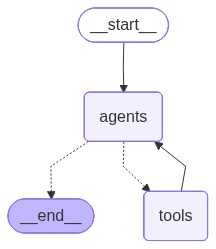

In [73]:
from IPython.display import Image, display
# Display the graph
display(Image(workflow.get_graph(xray=True).draw_mermaid_png()))

In [82]:
messages=[HumanMessage(content="famous food of birth place of wife of team captain who won 2007 ICC World Twenty20")]
res=workflow.invoke({"messages":messages})

In [83]:
for m in res["messages"]:
    m.pretty_print()

================================ Human Message =================================

famous food of birth place of wife of team captain who won 2007 ICC World Twenty20
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (fc_c2682852-5c5f-4f2e-ad5e-fdd8b2e894e0)
 Call ID: fc_c2682852-5c5f-4f2e-ad5e-fdd8b2e894e0
  Args:
    query: Sakshi Dhoni birthplace
================================= Tool Message =================================
Name: duckduckgo_search

1 week ago - Born in Ranchi , Dhoni made his first class debut for Bihar in 1999. He made his debut for the Indian cricket team on 23 December 2004 in an ODI against Bangladesh and played his first test a year later against Sri Lanka. April 11, 2025 - The couple tied the knot on July 4, 2010, after a two-year courtship. Sakshi and Dhoni first met at Taj Bengal, Kolkata , where she was interning. Despite attending the same school in Ranchi, they met much later. January 21, 2025

In [78]:
from langchain.agents import create_agent

In [ ]:
agent=create_agent(
    model=llm,
    tools=[search],
    system_prompt="You are a helpful assistant tasked with using search set of inputs."

)

In [84]:
result = agent.invoke(
    {"messages": [{"role": "user", "content": "famous food of birth place of wife of team captain who won 2007 ICC World Twenty20"}]}
)

In [85]:
for m in result["messages"]:
    m.pretty_print()


================================ Human Message =================================

famous food of birth place of wife of team captain who won 2007 ICC World Twenty20
================================== Ai Message ==================================
Tool Calls:
  duckduckgo_search (fc_7d753aa9-6cc4-4b40-b344-55875366cf3b)
 Call ID: fc_7d753aa9-6cc4-4b40-b344-55875366cf3b
  Args:
    query: Sakshi Dhoni birthplace
================================= Tool Message =================================
Name: duckduckgo_search

Shakshi Dhoni is the wife of the famous Indian cricketer Mahendra Singh Dhoni. Sakshi Dhoni was born as ‘Sakshi Singh Rawat’ on 19 November 1988 (age 30 years; as in 2018) in the Guwahati city of Assam . Her zodiac sign is Scorpio. Sakshi’s and Dhoni ’s father both were employees of the same company called Mecon. She and Dhoni knew each other well but the love ignited in winters of 2007 when they met in Kolkata through Yudhajit Dutta (Dhoni’s manager and friend). May 5, 2025 ·

In [88]:
import yfinance as yf
ticker = 'AAPL'
df = yf.download(ticker, start='2020-01-01', end='2023-01-01')
print(df.info())
print(df.head())

/tmp/ipykernel_34226/4285444080.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   756 non-null    float64
 1   (High, AAPL)    756 non-null    float64
 2   (Low, AAPL)     756 non-null    float64
 3   (Open, AAPL)    756 non-null    float64
 4   (Volume, AAPL)  756 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.4 KB
None
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.468254  72.528574  71.223252  71.476592  135480400
2020-01-03  71.763733  72.523762  71.539345  71.696175  146322800
2020-01-06  72.335564  72.374169  70.634547  70.885479  118387200
2020-01-07  71.995354  72.600960  71.775789  72.345204  108872000
2020-01-08  73.153496  73.455095  71.698581 

In [89]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.468254,72.528574,71.223252,71.476592,135480400
2020-01-03,71.763733,72.523762,71.539345,71.696175,146322800
2020-01-06,72.335564,72.374169,70.634547,70.885479,118387200
2020-01-07,71.995354,72.600960,71.775789,72.345204,108872000
2020-01-08,73.153496,73.455095,71.698581,71.698581,132079200
...,...,...,...,...,...
2022-12-23,129.900299,130.451974,127.713291,128.974267,63814900
2022-12-27,128.097488,129.456984,126.806960,129.427431,69007800


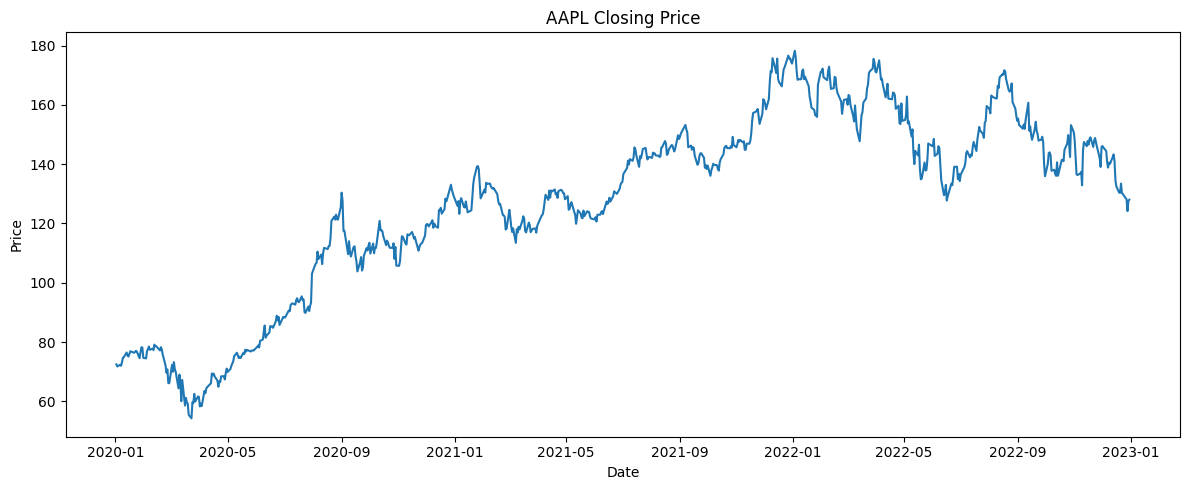

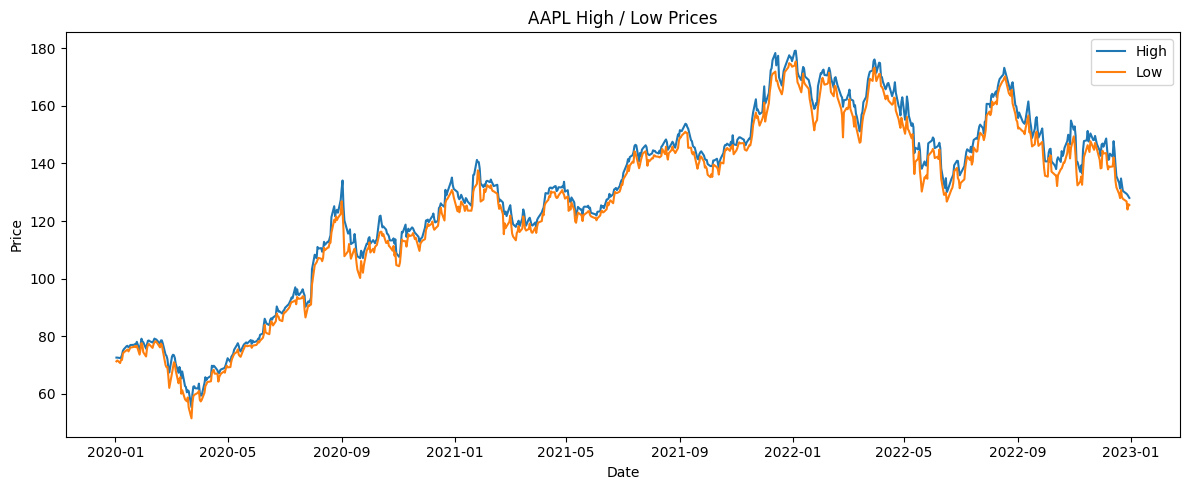

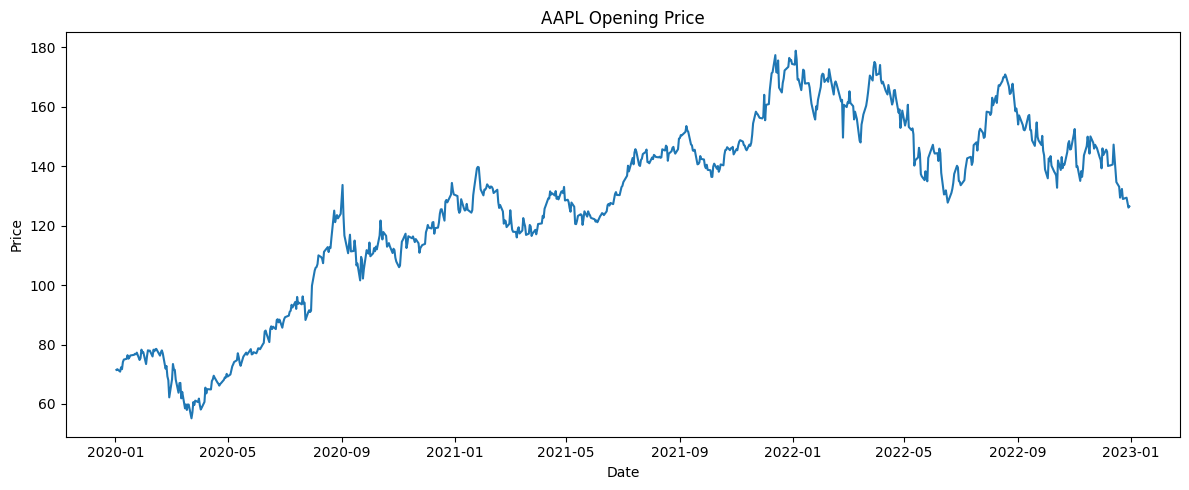

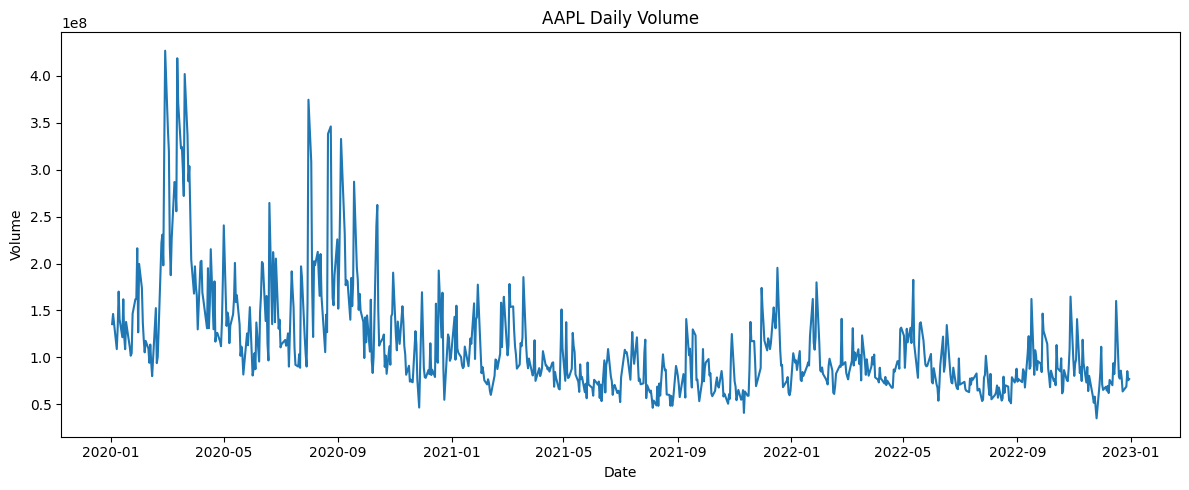

In [90]:
import matplotlib.pyplot as plt

# Assuming your dataframe is named df and uses a DatetimeIndex
# Columns look like: ('Close','AAPL'), ('High','AAPL'), ...

# Extract columns more easily
close = df[("Close", "AAPL")]
high = df[("High", "AAPL")]
low = df[("Low", "AAPL")]
open_ = df[("Open", "AAPL")]
volume = df[("Volume", "AAPL")]

# ---------------------
# 1. Closing Price Line Chart
# ---------------------
plt.figure(figsize=(12, 5))
plt.plot(close)
plt.title("AAPL Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# ---------------------
# 2. High & Low Price Line Chart
# ---------------------
plt.figure(figsize=(12, 5))
plt.plot(high, label="High")
plt.plot(low, label="Low")
plt.title("AAPL High / Low Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.tight_layout()
plt.show()

# ---------------------
# 3. Opening Price Line Chart
# ---------------------
plt.figure(figsize=(12, 5))
plt.plot(open_)
plt.title("AAPL Opening Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# ---------------------
# 4. Trading Volume Chart
# ---------------------
plt.figure(figsize=(12, 5))
plt.plot(volume)
plt.title("AAPL Daily Volume")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.tight_layout()
plt.show()


In [91]:
import yfinance as yf
ticker = 'AAPL'
stock = yf.Ticker(ticker)
balance_sheet = stock.balance_sheet
income_statement = stock.financials
print("Balance Sheet:")
print(balance_sheet.head())
print("\nIncome Statement:")
print(income_statement.head())

Balance Sheet:
                          2025-09-30    2024-09-30    2023-09-30  \
Treasury Shares Number           NaN           NaN  0.000000e+00   
Ordinary Shares Number  1.477326e+10  1.511679e+10  1.555006e+10   
Share Issued            1.477326e+10  1.511679e+10  1.555006e+10   
Net Debt                6.272300e+10  7.668600e+10  8.112300e+10   
Total Debt              9.865700e+10  1.066290e+11  1.110880e+11   

                          2022-09-30  2021-09-30  
Treasury Shares Number           NaN         NaN  
Ordinary Shares Number  1.594342e+10         NaN  
Share Issued            1.594342e+10         NaN  
Net Debt                9.642300e+10         NaN  
Total Debt              1.324800e+11         NaN  

Income Statement:
                                                      2025-09-30  \
Tax Effect Of Unusual Items                         0.000000e+00   
Tax Rate For Calcs                                  1.560000e-01   
Normalized EBITDA                              

In [92]:
balance_sheet

,2025-09-30,2024-09-30,2023-09-30,2022-09-30,2021-09-30
Treasury Shares Number,NaN,NaN,0.000000e+00,NaN,NaN
Ordinary Shares Number,1.477326e+10,1.511679e+10,1.555006e+10,1.594342e+10,NaN
Share Issued,1.477326e+10,1.511679e+10,1.555006e+10,1.594342e+10,NaN
Net Debt,6.272300e+10,7.668600e+10,8.112300e+10,9.642300e+10,NaN
Total Debt,9.865700e+10,1.066290e+11,1.110880e+11,1.324800e+11,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,5.469700e+10,6.517100e+10,6.155500e+10,4.830400e+10,NaN
Other Short Term Investments,1.876300e+10,3.522800e+10,3.159000e+10,2.465800e+10,NaN
Cash And Cash Equivalents,3.593400e+10,2.994300e+10,2.996500e+10,2.364600e+10,NaN
Cash Equivalents,7.667000e+09,2.744000e+09,1.606000e+09,5.100000e+09,NaN


In [93]:
income_statement

,2025-09-30,2024-09-30,2023-09-30,2022-09-30,2021-09-30
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN
Tax Rate For Calcs,1.560000e-01,2.410000e-01,1.470000e-01,1.620000e-01,NaN
Normalized EBITDA,1.447480e+11,1.346610e+11,1.258200e+11,1.305410e+11,NaN
Net Income From Continuing Operation Net Minority Interest,1.120100e+11,9.373600e+10,9.699500e+10,9.980300e+10,NaN
Reconciled Depreciation,1.169800e+10,1.144500e+10,1.151900e+10,1.110400e+10,NaN
Reconciled Cost Of Revenue,2.209600e+11,2.103520e+11,2.141370e+11,2.235460e+11,NaN
EBITDA,1.447480e+11,1.346610e+11,1.258200e+11,1.305410e+11,NaN
EBIT,1.330500e+11,1.232160e+11,1.143010e+11,1.194370e+11,NaN
Net Interest Income,NaN,NaN,-1.830000e+08,-1.060000e+08,1.980000e+08
Interest Expense,NaN,NaN,3.933000e+09,2.931000e+09,2.645000e+09


In [94]:
# Assuming bs = Balance Sheet dataframe
# and is_ = Income Statement dataframe
import pandas as pd
bs=balance_sheet
isc=income_statement
# Convert columns to datetime index for plotting
bs.columns = pd.to_datetime(bs.columns)
isc.columns = pd.to_datetime(isc.columns)

# Extract series
net_debt = bs.loc["Net Debt"]
total_debt = bs.loc["Total Debt"]
shares = bs.loc["Ordinary Shares Number"]

ebitda = isc.loc["Normalized EBITDA"]
net_income = isc.loc["Net Income From Continuing Operation Net Minority Interest"]
depreciation = isc.loc["Reconciled Depreciation"]

# Ratios
debt_to_ebitda = total_debt / ebitda
net_debt_to_ebitda = net_debt / ebitda


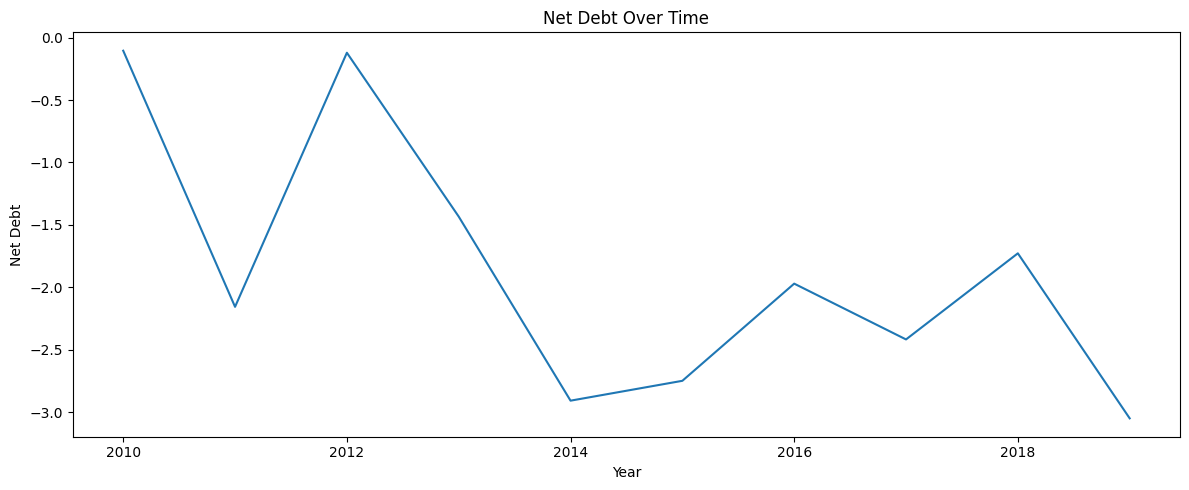

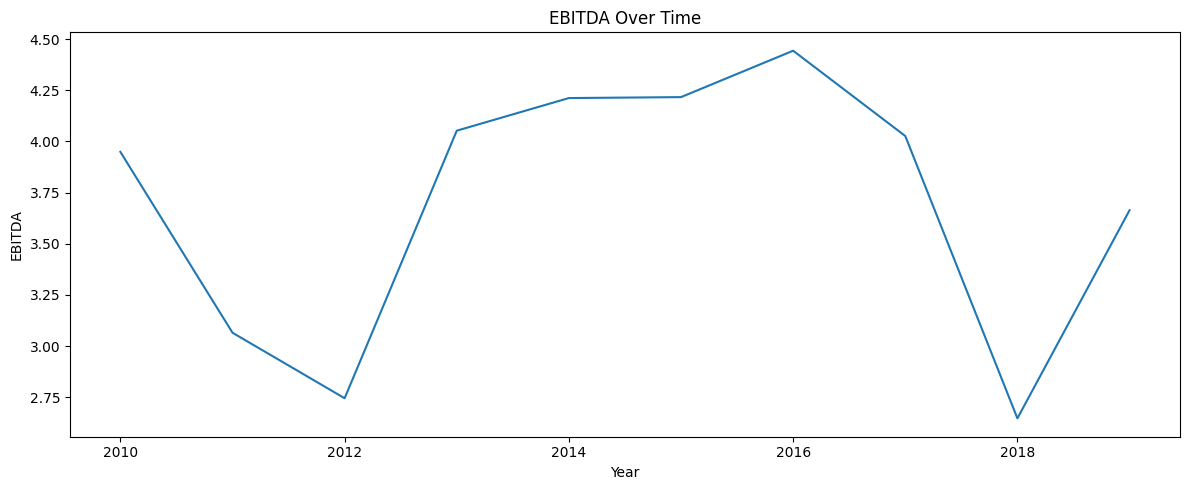

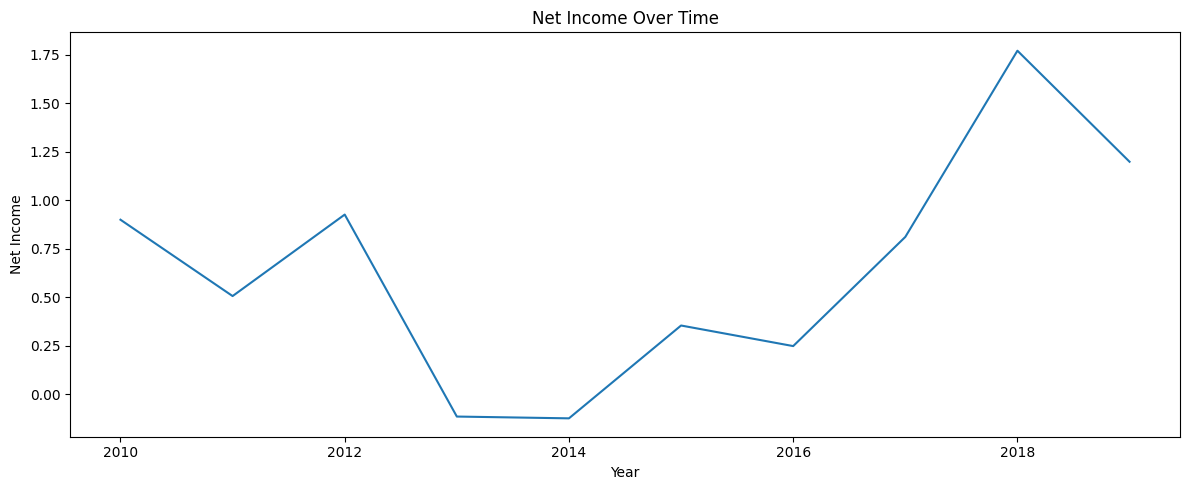

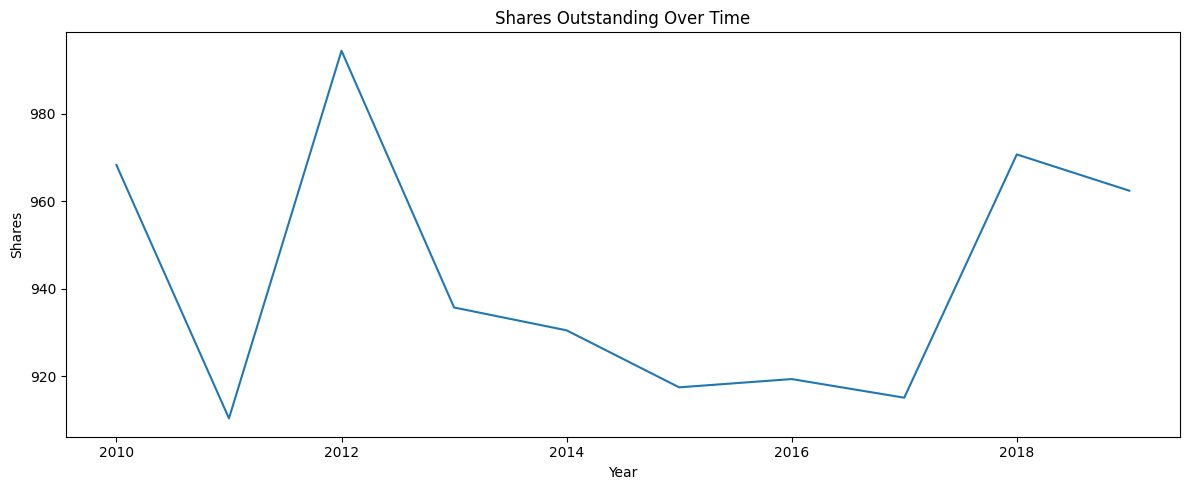

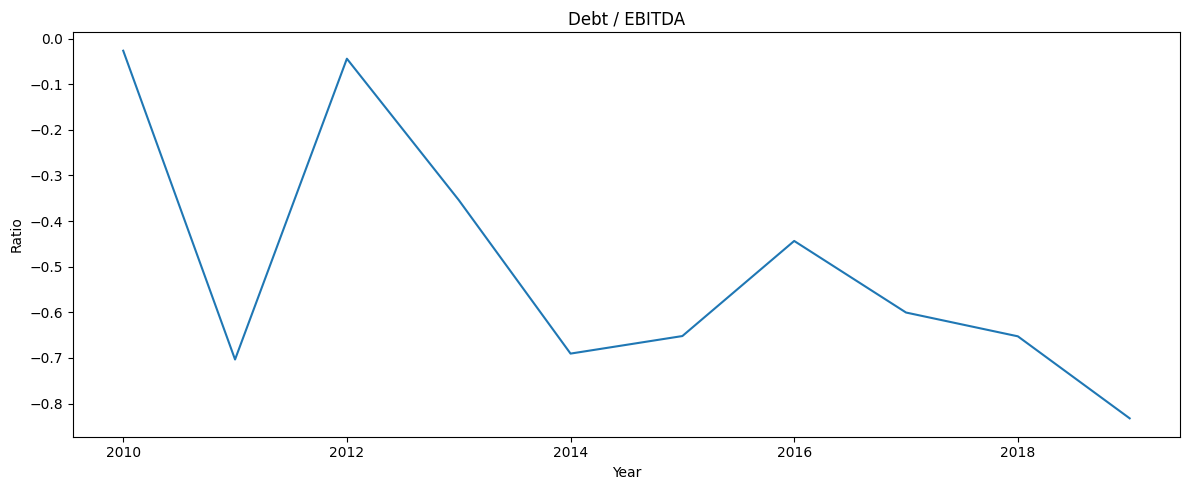

In [96]:
import matplotlib.pyplot as plt
import numpy as np

# Placeholder data (since none was provided)
years = np.arange(2010, 2020)
net_debt = np.random.randn(10).cumsum()
ebitda = np.random.randn(10).cumsum() + 5
net_income = np.random.randn(10).cumsum() + 2
shares = np.random.rand(10) * 100 + 900
debt_to_ebitda = net_debt / (ebitda + 1e-6)

# Net Debt
plt.figure(figsize=(12,5))
plt.plot(years, net_debt)
plt.title("Net Debt Over Time")
plt.xlabel("Year")
plt.ylabel("Net Debt")
plt.tight_layout()
plt.show()

# EBITDA
plt.figure(figsize=(12,5))
plt.plot(years, ebitda)
plt.title("EBITDA Over Time")
plt.xlabel("Year")
plt.ylabel("EBITDA")
plt.tight_layout()
plt.show()

# Net Income
plt.figure(figsize=(12,5))
plt.plot(years, net_income)
plt.title("Net Income Over Time")
plt.xlabel("Year")
plt.ylabel("Net Income")
plt.tight_layout()
plt.show()

# Shares Outstanding
plt.figure(figsize=(12,5))
plt.plot(years, shares)
plt.title("Shares Outstanding Over Time")
plt.xlabel("Year")
plt.ylabel("Shares")
plt.tight_layout()
plt.show()

# Debt / EBITDA
plt.figure(figsize=(12,5))
plt.plot(years, debt_to_ebitda)
plt.title("Debt / EBITDA")
plt.xlabel("Year")
plt.ylabel("Ratio")
plt.tight_layout()
plt.show()
